# 📊 Normalização e Padronização de Dados - Base Wine


## 🎯 Objetivo


- Normalização (Min-Max Scaling)
- Padronização (Z-score Standardization)
- Comparação visual dos resultados

Essas técnicas são essenciais para algoritmos de aprendizado de máquina sensíveis à escala dos dados, como k-NN e SVM.

## 📦 Bibliotecas e Base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 🧬 Carregando a base Wine

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 🔍 Análise Inicial

In [3]:
print(df.shape)
df.describe().T

(178, 14)


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## 🔢 Seleção de variáveis numéricas

In [4]:
features = df.drop(columns='target')

## 🔧 Aplicando Normalização (Min-Max)

In [5]:
scaler_minmax = MinMaxScaler()
normalized = scaler_minmax.fit_transform(features)
df_normalized = pd.DataFrame(normalized, columns=features.columns)
df_normalized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


## 🔧 Aplicando Padronização (Z-score)

In [6]:
scaler_std = StandardScaler()
standardized = scaler_std.fit_transform(features)
df_standardized = pd.DataFrame(standardized, columns=features.columns)
df_standardized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 📊 Comparação Gráfica (Exemplo com 3 variáveis)

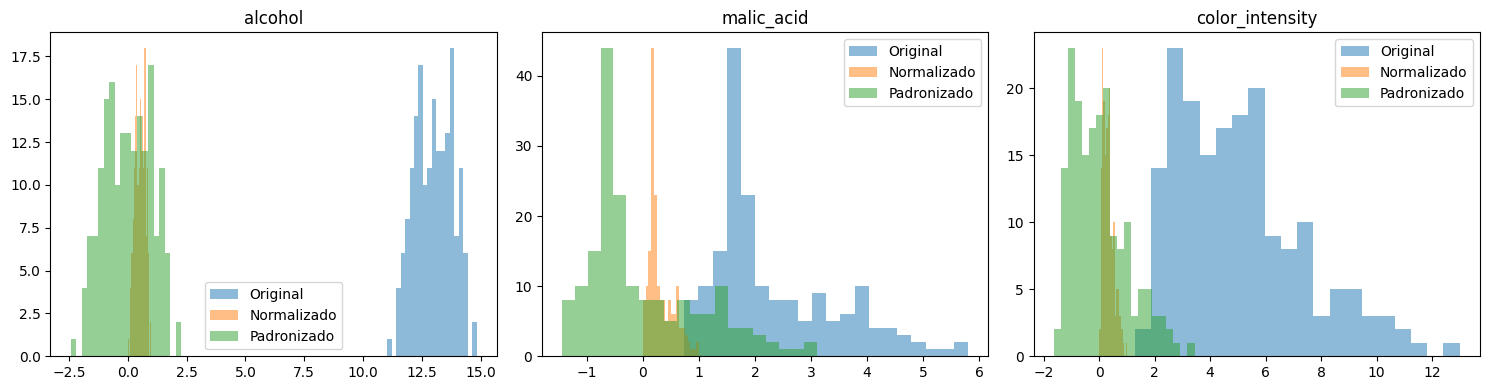

In [7]:
cols = ['alcohol', 'malic_acid', 'color_intensity']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(cols):
    axs[i].hist(df[col], bins=20, alpha=0.5, label='Original')
    axs[i].hist(df_normalized[col], bins=20, alpha=0.5, label='Normalizado')
    axs[i].hist(df_standardized[col], bins=20, alpha=0.5, label='Padronizado')
    axs[i].set_title(col)
    axs[i].legend()

plt.tight_layout()
plt.show()

## 📌 Considerações finais

- **Normalização** força os dados para um intervalo fixo (geralmente entre 0 e 1). Útil para redes neurais e distâncias.
- **Padronização** centra os dados na média 0 e desvio padrão 1. Recomendado quando a distribuição importa.
- Escolha depende do algoritmo e da distribuição dos dados.
